Epoch 1: Train Loss = 1.82, Test Loss = 1.09
Epoch 2: Train Loss = 0.75, Test Loss = 0.74
Epoch 3: Train Loss = 0.37, Test Loss = 0.64
Epoch 4: Train Loss = 0.22, Test Loss = 0.70
Epoch 5: Train Loss = 0.14, Test Loss = 0.69
Epoch 6: Train Loss = 0.12, Test Loss = 0.64
Epoch 7: Train Loss = 0.06, Test Loss = 0.68
Epoch 8: Train Loss = 0.04, Test Loss = 0.69
Epoch 9: Train Loss = 0.02, Test Loss = 0.76
Epoch 10: Train Loss = 0.01, Test Loss = 0.69
Epoch 11: Train Loss = 0.00, Test Loss = 0.66
Epoch 12: Train Loss = 0.00, Test Loss = 0.69
Epoch 13: Train Loss = 0.00, Test Loss = 0.69
Epoch 14: Train Loss = 0.00, Test Loss = 0.70
Epoch 15: Train Loss = 0.00, Test Loss = 0.71
Epoch 16: Train Loss = 0.00, Test Loss = 0.72
Epoch 17: Train Loss = 0.00, Test Loss = 0.72
Epoch 18: Train Loss = 0.00, Test Loss = 0.73
Epoch 19: Train Loss = 0.00, Test Loss = 0.74
Epoch 20: Train Loss = 0.00, Test Loss = 0.74


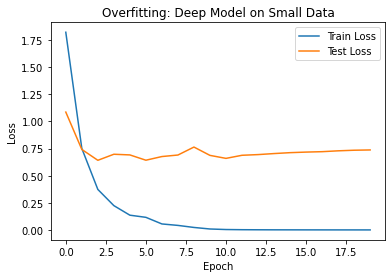

In [8]:
#OVERFITTING EXAMPLE FOR A CLASSIFICATION PROBLEM

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST but use only a small subset
train_full = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.randperm(len(train_full))[:500]  # only 500 samples
train_data = Subset(train_full, subset_indices)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Deep model that overfits
class OverfitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

model = OverfitNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training loop
train_loss_list = []
test_loss_list = []

for epoch in range(20):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss_list.append(total_loss / len(train_loader))

    # Evaluate
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
    test_loss_list.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}: Train Loss = {train_loss_list[-1]:.2f}, Test Loss = {test_loss_list[-1]:.2f}")

# Plot overfitting
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title("Overfitting: Deep Model on Small Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Epoch 1: Train Loss = 0.39, Test Loss = 0.28
Epoch 2: Train Loss = 0.29, Test Loss = 0.27
Epoch 3: Train Loss = 0.28, Test Loss = 0.28
Epoch 4: Train Loss = 0.27, Test Loss = 0.28
Epoch 5: Train Loss = 0.27, Test Loss = 0.28
Epoch 6: Train Loss = 0.27, Test Loss = 0.28
Epoch 7: Train Loss = 0.27, Test Loss = 0.27
Epoch 8: Train Loss = 0.26, Test Loss = 0.28
Epoch 9: Train Loss = 0.26, Test Loss = 0.29
Epoch 10: Train Loss = 0.26, Test Loss = 0.28


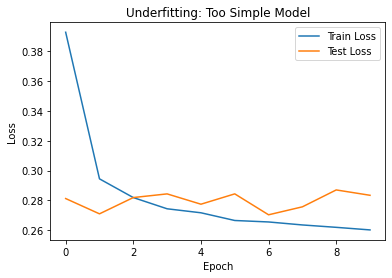

In [9]:
# UNDERFITTING EXAMPLE FOR A CLASSIFICATION PROBLEM

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load full MNIST training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

class UnderfitNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 10)  # Directly maps input to output

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.fc1(x)

model = UnderfitNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

train_loss_list = []
test_loss_list = []

for epoch in range(10):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss_list.append(total_loss / len(train_loader))

    # Evaluation
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)
    test_loss_list.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}: Train Loss = {train_loss_list[-1]:.2f}, Test Loss = {test_loss_list[-1]:.2f}")

# Plot training and test loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title("Underfitting: Too Simple Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
